In [119]:
## MP 573 Lecture 13: Properties of the DFT
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import scipy.linalg as lin
import time

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)



## Linear vs Circular Convolution

In our discussion of DFTs, it will be important to distinguish the linear convolution (denoted by $\ast$)  from the circular convolution (denoted by $\circledast$) between two sequences. 

**Linear convolution.** For any two length-M sequences $f_1[m] $ and $f_2[m]$, their linear convolution  is defined as $$\left( f_1 \ast f_2 \right) [m] = \sum_{l=0}^{M-1} f_1[l] f_2[m-l]  \hbox{, for } m=0,1,\ldots,2M-2$$
where $f_2[m-l]$ is assumed to be zero for values of $m-l$ outside the range $[0,M-1]$. In other words, the linear convolution assumes a non-periodic (zero-padded) extension of the input sequences. 

**Circular convolution.** For any two length-M sequences $f_1[m] $ and $f_2[m]$, their circular convolution (also known as ``periodic convolution'') is defined as follows: $$\left( f_1 \circledast f_2 \right) [m] = \sum_{l=0}^{M-1} f_1[l] f_2[(m-l)_M]  \hbox{, for } m=0,1,\ldots,M-1$$

where $(\cdot)_M$ in $f_2[(m-l)_M]$ refers to the modulo operation (the remainder of the division $\frac{m-l}{M}$), and is sometimes written as $(m-l) \mod M$. Importantly, for two length-M sequences $f_1[m] $ and $f_2[m]$, their linear convolution is a sequence of length $2M-1$, whereas their circular convolution is a sequence of length $M$. In other words, the linear and circular convolutions are fundamentally different operations. However, they are equivalent under certain conditions, which we will examine in subsequent lectures. 


## Circular convolution property.  

The circular convolution between two sequences has DFT given by the multiplication of their corresponding DFTs. In other words, the DFT of $f_3[m] = \left( f_1 \circledast f_2 \right) [m]$ is $\hat{f_3}[k] = \hat{f_1}[k] \hat{f_2}[k]$. 

In [84]:
# Here is a simple implementation of circular convolution
def cconv(f1,f2):
    M = len(f1)
    f3 = 0*f1
    for m in range(M):
        for m2 in range(M):
            f3[m] = f3[m] + f1[m2]*f2[(m-m2)%M]
    return f3

Linear convolution 
Time required: 
0.00010704994201660156

Circular convolution: 
Time required: 
8.7738037109375e-05


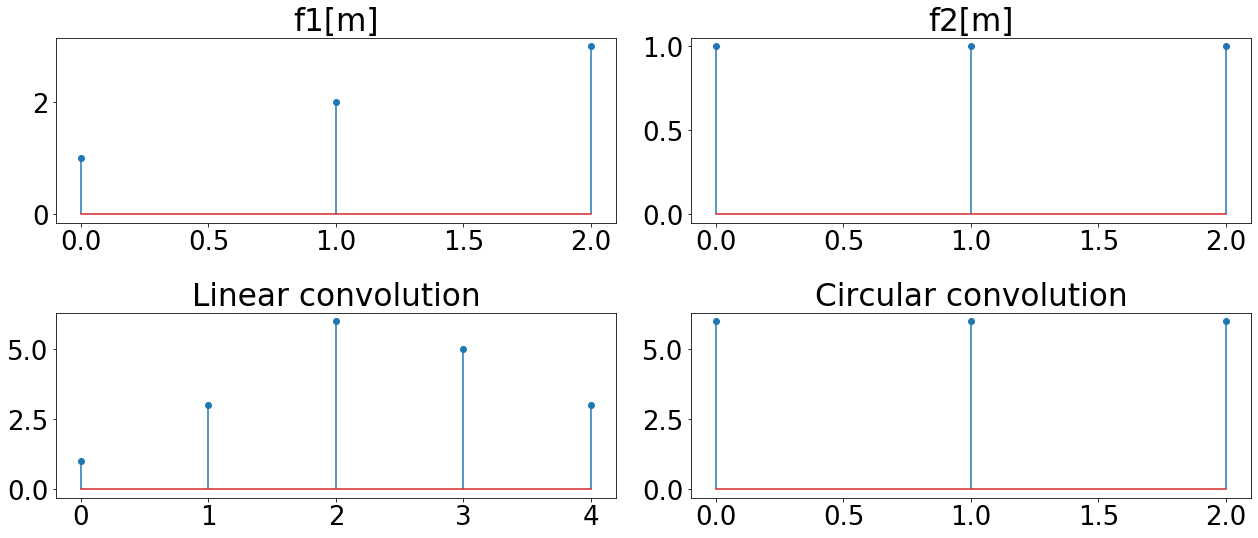

In [100]:
# Create some signals f1 and f2
f1 = np.array([1.,2.,3.])
f2 = np.array([1.,1.,1.])

# Do linear convolution
t = time.time()
f3_linear = np.convolve(f1,f2)
elapsed_linear = time.time() - t

# Do circular convolution
t = time.time()
f3_circ = cconv(f1,f2)
elapsed_circ = time.time() - t


# Plot original signals and convolutions
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(f1,use_line_collection=True)
plt.title('f1[m]')
plt.subplot(2,2,2)
plt.stem(f2,use_line_collection=True)
plt.title('f2[m]')

print('Linear convolution ')
#print(f3_linear)
plt.subplot(2,2,3)
plt.stem(f3_linear,use_line_collection=True)
plt.title('Linear convolution')
print('Time required: ')
print(elapsed_linear)


plt.subplot(2,2,4)
plt.stem(f3_circ,use_line_collection=True)
plt.title('Circular convolution')
print('\nCircular convolution: ')
#print(f3_circ)
print('Time required: ')
print(elapsed_circ)
plt.tight_layout(pad=1.0)


DFT-based convolution: 
Time required: 
0.000537872314453125


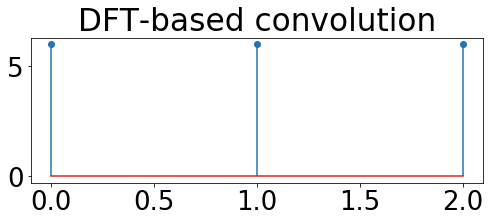

In [107]:
# Now calculate the convolution using multiplication in the DFT domain
t = time.time()
fhat1 = np.fft.fft(f1)
fhat2 = np.fft.fft(f2)
fhat3 = fhat1*fhat2
f3_dft = np.fft.ifft(fhat3)
elapsed_dft = time.time() - t

plt.figure(figsize=(14,6))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(np.real(f3_dft),use_line_collection=True)
plt.title('DFT-based convolution')
plt.tight_layout(pad=1.0)


print('DFT-based convolution: ')
#print(np.real(f3_dft))
print('Time required: ')
print(elapsed_dft)

## Circular shift property. 

If length-M sequence $f_1[m]$ has DFT $\hat{f}_1[k]$, then $f_2[m] = f_1[(m-l)_M]$ (ie: $f_2$ is $f_1$ circularly shifted by $l$ samples) will have DFT $\hat{f}_2[k] = \hat{f}_1[k]e^{-i 2 \pi \frac{lk}{M}}$. Note that this is similar to the translation property of the continuous-time FT, except in the case of the DFT it applies to circular shifts rather than linear shifts. 

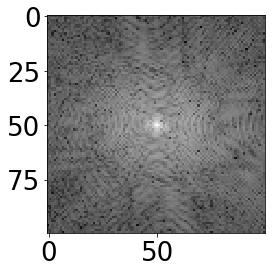

In [116]:
# Load some image from file
#import h5py
#hdf5_path = 'dataset.hdf5'
#brain_dataset = h5py.File(hdf5_path, "r")
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']


plt.imshow(np.log(abs(fhat)),cmap='gray');

Text(0.5, 1.0, 'f[m,n] Phase')

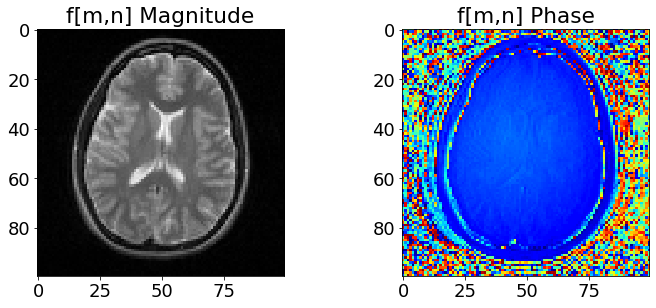

In [122]:
f = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat)))
plt.figure(figsize=(12,10))
plt.rc('font', **font)
plt.subplot(2,2,1)
imgplot = plt.imshow(abs(f),cmap='gray')
plt.title('f[m,n] Magnitude')

plt.subplot(2,2,2)
imgplot = plt.imshow(np.angle(f),cmap='jet')
plt.title('f[m,n] Phase')




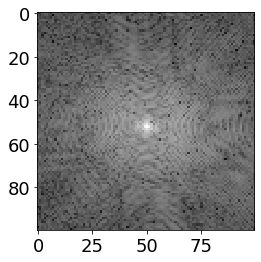

In [137]:
# Shift in Fourier-space
fhat2 = np.roll(fhat, 2, axis=0);
#fhat2 = np.roll(fhat2, 3, axis=1);

imgplot = plt.imshow(np.log(abs(fhat2)),cmap='gray')

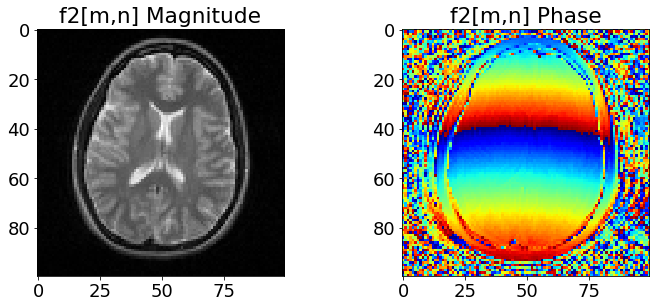

In [139]:
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))

plt.figure(figsize=(12,10))
plt.rc('font', **font)
plt.subplot(2,2,1)
imgplot = plt.imshow(abs(f2),cmap='gray')
plt.title('f2[m,n] Magnitude')

plt.subplot(2,2,2)
imgplot = plt.imshow(np.angle(f2),cmap='jet')
plt.title('f2[m,n] Phase');

## Parseval's theorem. 

For any two length-M signals $f_1[m]$ and $f_2[m]$, the following relationship holds:
$$\sum_{m=0}^{M-1} f_1[m] \overline{f_2[m]} = \frac{1}{M} \sum_{k=0}^{M-1} \hat{f}_1[k] \overline{\hat{f}_2[k]}$$
Note that this relationship implies that, given that $f[m] \overline{f[m]} = |f[m]|^2$, the energy of a signal in both domains obeys the following relationship: 
$$\sum_{m=0}^{M-1} |f[m]|^2 = \frac{1}{M} \sum_{k=0}^{M-1} |\hat{f}[k]|^2$$

## Q1: Linear convolution of discrete sequences

If we convolve two length-M sequences using **linear convolution**, the resulting sequence will have the following length:

A: M-1

B: M

C: 2M-1

D: 2M

## Q2: Circular convolution of discrete sequences

If we convolve two length-M sequences using **circular convolution**, the resulting sequence will have the following length:

A: M-1

B: M

C: 2M-1

D: 2M

## Q3: Convolution and DFTs

We have two length-M sequences $f_1[m]$ and $f_2[m]$, and we run the following operations: 
1. DFT of each sequence, to obtain $\hat{f}_1[k]$ and $\hat{f}_2[k]$
2. Pointwise multiplication of the DFTs, to obtain $\hat{f}_3[k] = \hat{f}_1[k]\hat{f}_2[k]$
3. Inverse DFT, to obtain $f_3[m]$

What would be the equivalent operation in the 'spatial' domain, that would yield the same sequence $f_3[m]$?

A: Linear convolution between $f_1[m]$ and $f_2[m]$

B: Circular convolution between $f_1[m]$ and $f_2[m]$

C: Pointwise multiplication between $f_1[m]$ and $f_2[m]$

D: Sum of $f_1[m]$ and $f_2[m]$

## Q4: Euclidean norms and DFTs

If we have a length-M (M=100) sequence $f[m]$ with Euclidean norm $\sqrt{ \sum_{m=0}^{M-1} |f[m]|^2} = 10$, what is the norm of its DFT $\hat{f}[k]$?   

A: 0

B: 1

C: 10

D: 100